In [4]:
import requests
from bs4 import BeautifulSoup
import json
import matplotsoccer
import matplotlib.pyplot as plt

In [5]:
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'uk,ru-RU;q=0.9,ru;q=0.8,en-US;q=0.7,en;q=0.6',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"9f784e861d"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
}
headers['If-Modified-Since'] = 'Mon, 1 Jan 2024 00:00:00 GMT'
response = requests.get('https://api.sofascore.com/api/v1/event/11369369/average-positions', headers=headers)

In [14]:
def avarage_positions(team,timing,name):
    sub_player_type = ''

    if timing==True:
        sub_player_type='playerIn'
    else:
        sub_player_type='playerOut'

    legend_labels = []
    legend_texts = []

    matplotsoccer.field("green",figsize=8, show=False)
    if timing==True:
        plt.title(f"{name} starting lineup")
    else:
        plt.title(f"{name} finishing lineup")

    for home_player in response.json()[team]:
        is_sub = False
        for sub_player in response.json()['substitutions']:
            if home_player['player']['id']==sub_player[sub_player_type]['id']:
                is_sub=True
        if is_sub==True:
            continue
        else:
            jersey_number = home_player['player']['jerseyNumber']
            x, y = home_player['averageY'], home_player['averageX']
            plt.scatter(y, x*0.7-2)
            plt.annotate(jersey_number, (y, x*0.7-2), textcoords="offset points", xytext=(0,10), ha='center')
            legend_labels.append(jersey_number)
            legend_texts.append(home_player['player']['name'])

    # Adjust figure size and add a legend outside the plot
    fig = plt.gcf()
    fig.set_size_inches(10, 6)  # Adjust the figure size as needed

    # Add a legend with title and custom labels
    ax = plt.gca()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 1.2, pos.height])
    legend = ax.legend(legend_labels, title='Players', loc='center right', bbox_to_anchor=(1.25, 0.5))

    for handle in legend.legendHandles:
        handle.set_visible(False)

    # Add additional text to the legend
    for label, text in zip(legend_labels, legend_texts):
        legend.get_texts()[legend_labels.index(label)].set_text(f"{label}: {text}")

    plt.show()

C:\Users\Tymof\AppData\Local\Temp\ipykernel_18860\3777206554.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


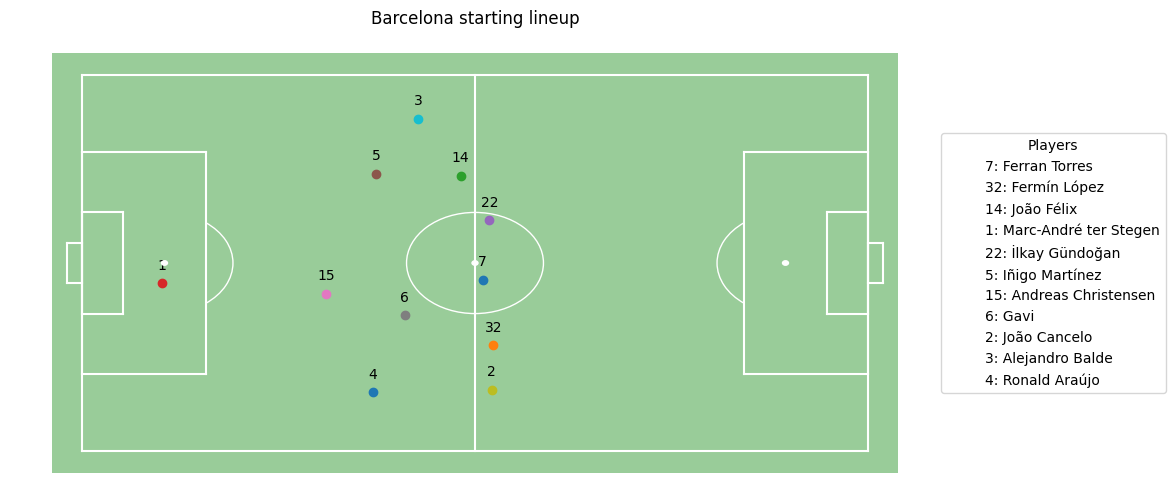

In [18]:
avarage_positions('home',True,"Barcelona")

C:\Users\Tymof\AppData\Local\Temp\ipykernel_18860\3777206554.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


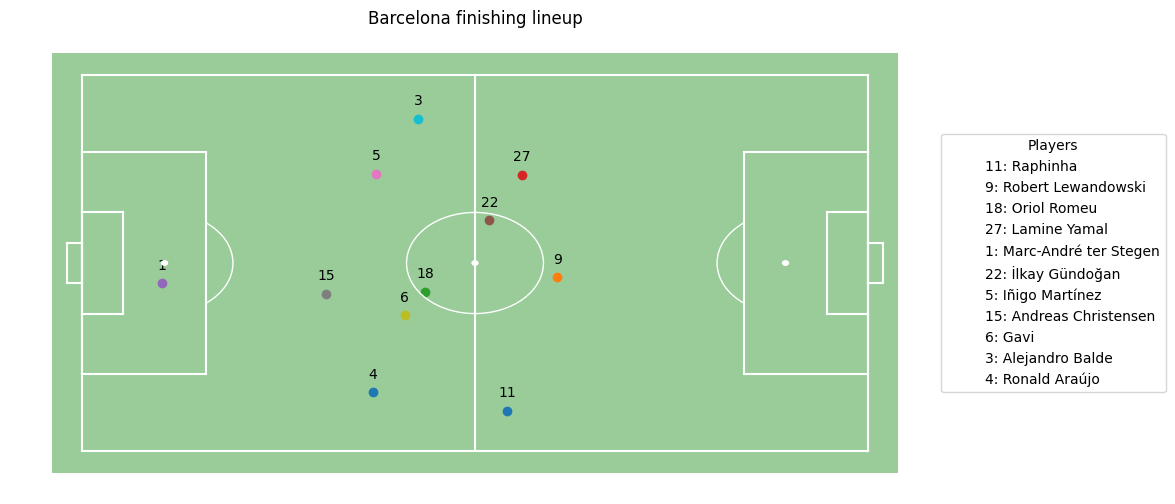

In [19]:
avarage_positions('home',False,"Barcelona")

C:\Users\Tymof\AppData\Local\Temp\ipykernel_18860\3777206554.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


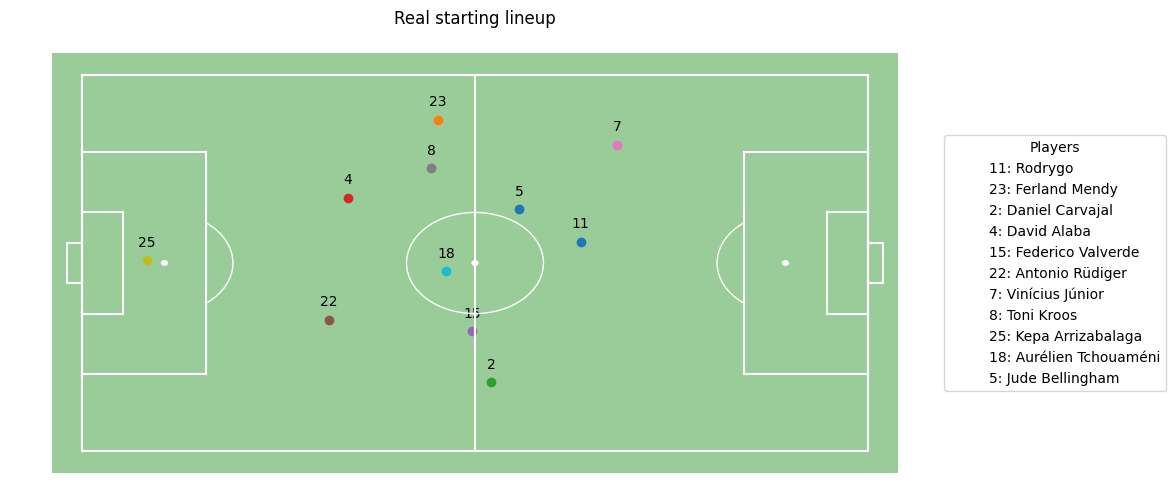

In [20]:
avarage_positions('away',True,"Real")

C:\Users\Tymof\AppData\Local\Temp\ipykernel_18860\3777206554.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


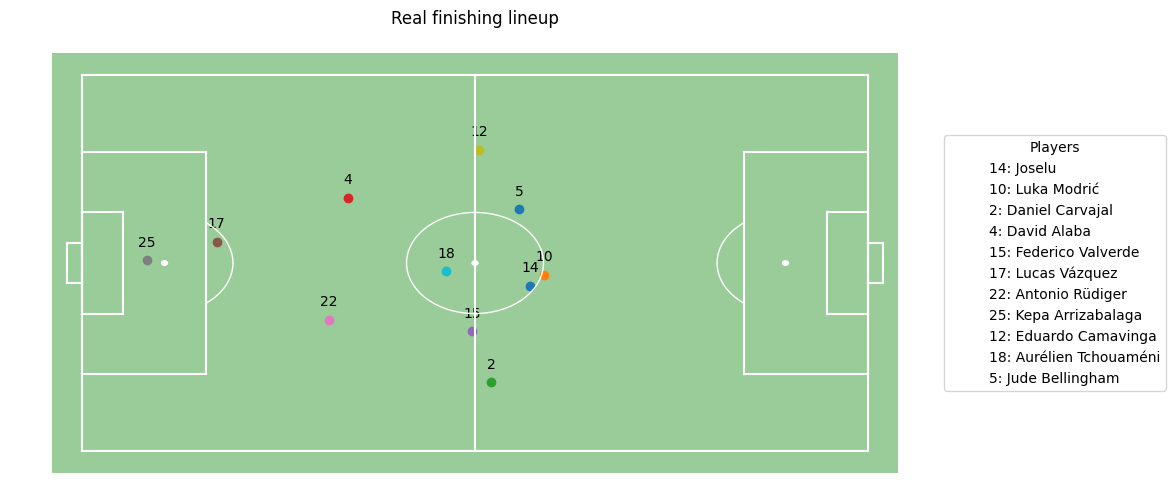

In [21]:
avarage_positions('away',False,"Real")